# 📚 Book Sales and Ratings Analysis
Gain insights into book popularity, ratings, sales trends, and key publishing statistics using data visualization and exploratory data analysis (EDA).

## 📊 Project Objective

This project aims to explore and analyze a dataset of books, focusing on their sales performance, average ratings, and other characteristics such as language and format. By using Python libraries like Pandas, Matplotlib, and Seaborn, we will:

- Perform data cleaning and preparation
- Visualize key sales and rating trends
- Uncover potential relationships between variables
- Provide actionable insights for publishers or retailers

## 📁 Dataset Description

The dataset, obtained from Kaggle, contains cleaned information about books, including:

- **Title** – Name of the book
- **Author** – Author of the book
- **Language** – Language in which the book is written
- **Rating** – Average user rating
- **Reviews** – Number of reviews
- **Price** – Retail price
- **Year** – Year of publication
- **Genre** – Book category (e.g., Fiction, Non-Fiction)
- **Format** – Hardcover, Paperback, etc.


link - [dataset](https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings) [ https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings ]

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('/content/drive/MyDrive/datasets/Books_Data_Clean.csv')

In [72]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [25]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [26]:
# filter to remove negative publishing yesrs
df = df[df['Publishing Year'] > 1900]

In [27]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [28]:
# drop null rows on Book name
df.dropna(subset='Book Name', inplace=True)

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


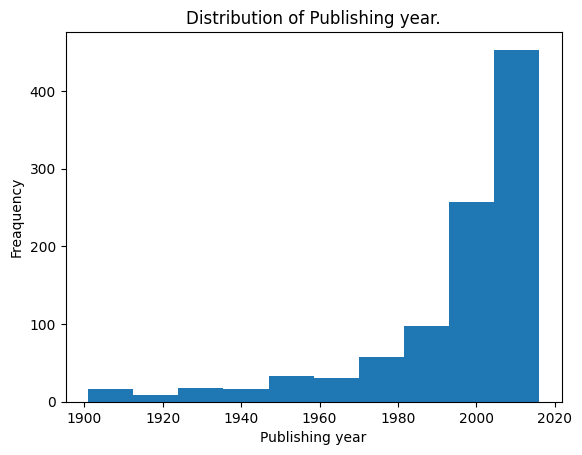

In [31]:
# create histogram to see distribution of publishing year
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing year')
plt.ylabel('Freaquency')
plt.title("Distribution of Publishing year.")
plt.show()

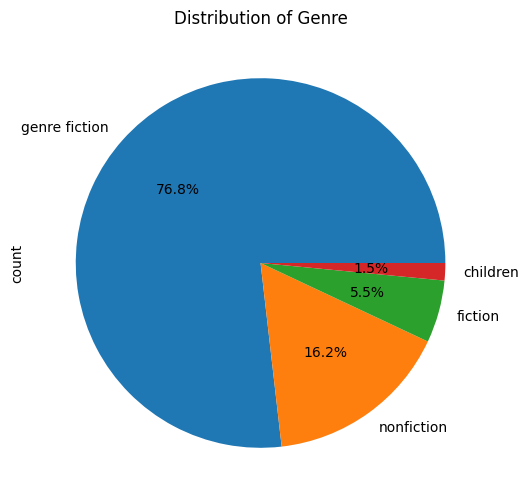

In [32]:
# make a pie chart of genre representing the percentage of each genre
df['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Distribution of Genre')
plt.show()
# plt.xlabel('Genre')
# plt.ylabel('Frequency')
# plt.title('Distribution of Genre')
# plt.show()


In [33]:
# show book average rating by author
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending=False).head(10)

,Book_average_rating
Author,
Bill Watterson,4.650
"Bill Watterson, G.B. Trudeau",4.610
J.R.R. Tolkien,4.590
George R.R. Martin,4.560
Sarah J. Maas,4.526
"Hiromu Arakawa, Akira Watanabe",4.490
Cassandra Clare,4.480
Art Spiegelman,4.470
Larry McMurtry,4.470


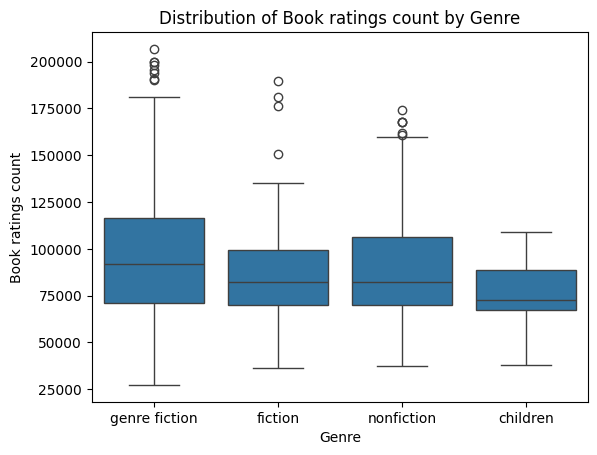

In [34]:
# make a boxplot of book ratings count by genre
sns.boxplot(x='genre', y='Book_ratings_count', data=df)
plt.xlabel('Genre')
plt.ylabel('Book ratings count')
plt.title('Distribution of Book ratings count by Genre')
plt.show()

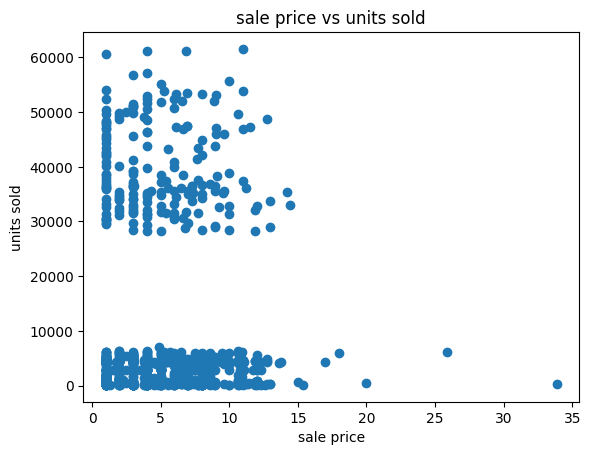

In [35]:
# make scatter plot of sale price vs units sold
plt.scatter(df['sale price'], df['units sold'])
plt.xlabel('sale price')
plt.ylabel('units sold')
plt.title('sale price vs units sold')
plt.show()

In [36]:
language_counts = df['language_code'].value_counts()

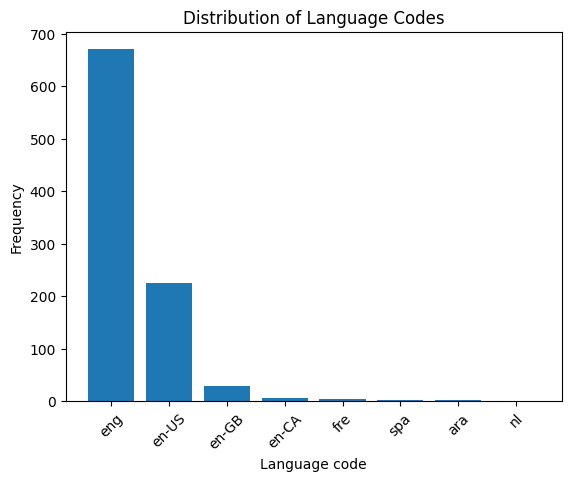

In [37]:
# create a bar chart of language counts
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language code')
plt.ylabel('Frequency')
plt.title('Distribution of Language Codes')
plt.xticks(rotation=45)
plt.show()

In [71]:
# let's see the top 10 publishers by revenue
publisher = df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending=False).head(10)
publisher
# sns.lineplot(x=publisher.index, y=publisher.values)
# plt.xlabel('Publisher')
# plt.ylabel('Revenue')
# plt.title('Publisher Revenue')
# plt.xticks(rotation=90)
# plt.show()

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


In [39]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [40]:
# group by author rating and show the average book ratings count
df.groupby('Author_Rating')['Book_ratings_count'].mean().round(2)

,Book_ratings_count
Author_Rating,
Excellent,83804.80
Famous,98295.25
Intermediate,101400.27
Novice,87318.46


In [48]:
# let's group by language code and show the size of each group
df.groupby('language_code').size()

,0
language_code,
ara,2
en-CA,7
en-GB,29
en-US,226
eng,670
fre,4
nl,1
spa,2


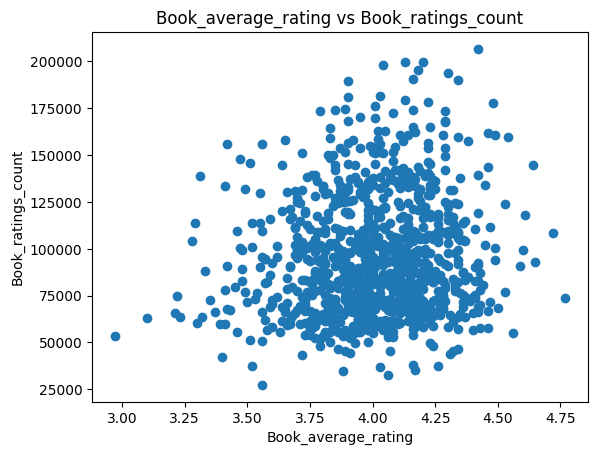

In [49]:
# let's see scatter plot of book average rating vs book ratings count
plt.scatter(df['Book_average_rating'], df['Book_ratings_count'])
plt.xlabel('Book_average_rating')
plt.ylabel('Book_ratings_count')
plt.title('Book_average_rating vs Book_ratings_count')
plt.show()

In [50]:
# sum of gross sales for each author
author_by_sales = df.groupby('Author')['gross sales'].sum().round(2).sort_values(ascending=False).head(20)
author_by_sales

,gross sales
Author,
Harper Lee,47795.00
Stephen King,43322.65
David Sedaris,42323.41
Charlaine Harris,39453.08
Laini Taylor,38278.41
"Unknown, Seamus Heaney",34160.00
Sarah Dessen,31034.85
Colleen Hoover,29706.14
C.S. Lewis,28972.57


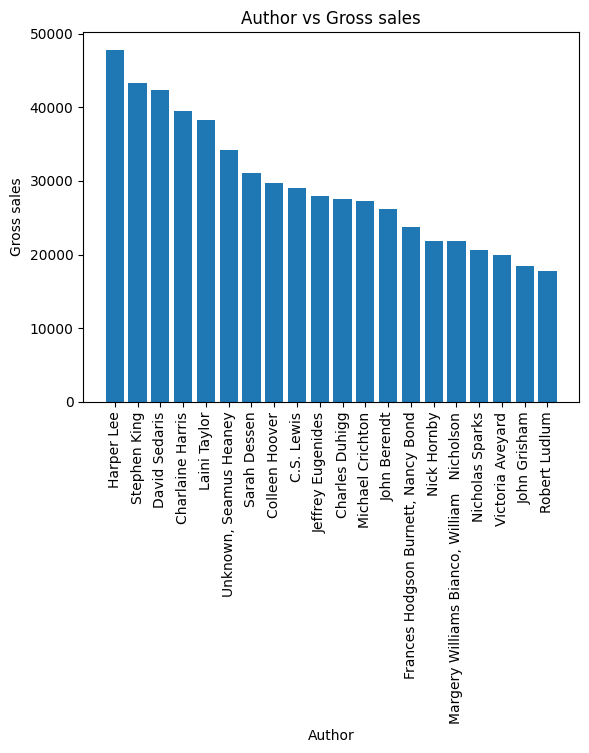

In [44]:
# let's see bar chart of author by gross sales
plt.bar(author_by_sales.index, author_by_sales.values)
plt.xlabel('Author')
plt.ylabel('Gross sales')
plt.title('Author vs Gross sales')
plt.xticks(rotation=90)
plt.show()

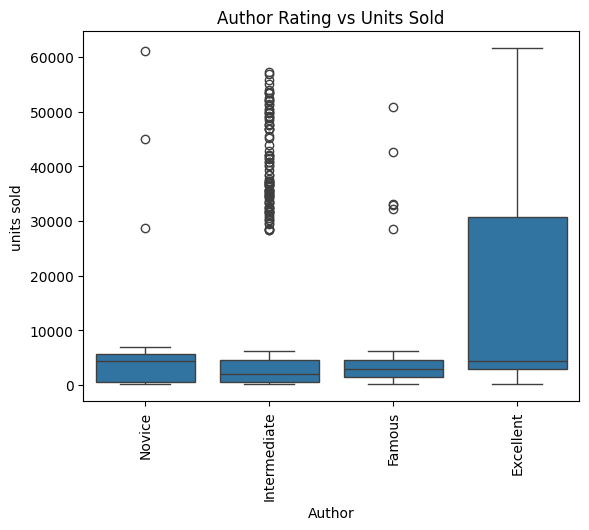

In [45]:
# make boxplot of author rating vs units sold
sns.boxplot(x='Author_Rating', y='units sold', data=df)
plt.xlabel('Author')
plt.ylabel('units sold')
plt.title('Author Rating vs Units Sold')
plt.xticks(rotation=90)
plt.show()

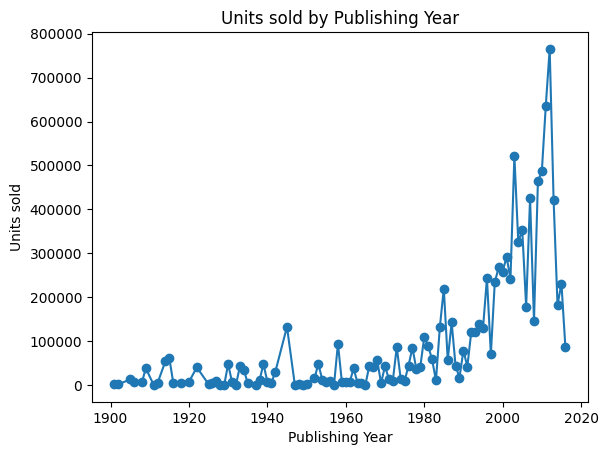

In [52]:
# group by publishing year and show the sum of units sold with a line chart
df.groupby("Publishing Year")['units sold'].sum().round(2).plot(kind='line', marker='o')
plt.xlabel("Publishing Year")
plt.ylabel("Units sold")
plt.title("Units sold by Publishing Year")
plt.show()

Over 120 years, numbers of books sold increased almost 8 times between 2000 and 2020.

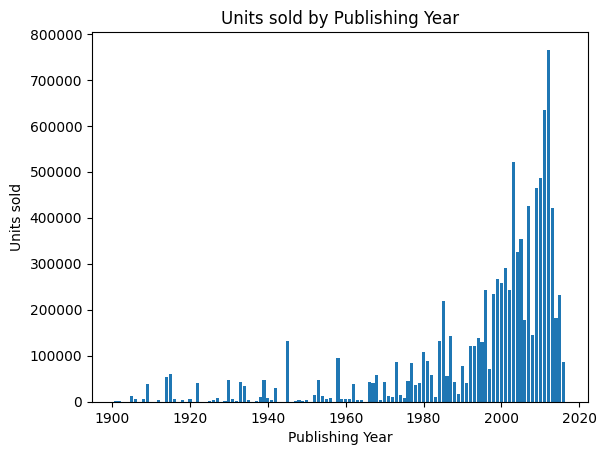

In [66]:
year = df.groupby('Publishing Year')['units sold'].sum().round(2)
plt.bar(year.index, year.values)
plt.xlabel('Publishing Year')
plt.ylabel('Units sold')
plt.title('Units sold by Publishing Year')
plt.show()

# **🔍 Summary of Findings:**

* number of units sold increased remarkably between 2000 and 2015;
* for language category, 'eng' has considerable dominance reaching almost 700;
* for number of book by genre, real dominance belongs to non-fiction books reaching 76.8% and, second top genre is fiction which accounts for 16.2% of whole books sold;
* price of almost all books ranges from 1 to 15 dollars;
* top 3 publishers by revenue are Penguin Group (USA) LLC,  Random House LLC,  Amazon Digital Services, Inc.
* top 3 authors by gross sales are Harper Lee, Stephen King, Harper Lee;
